In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from sklearn import cross_validation
from sklearn.svm import SVC
import utilities

In [18]:
data=pd.read_csv("TestData02.csv", header=-1)
data
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
type(x),type(y)
x1=x.values
y1=y.values.reshape(-1,1)

In [17]:
data.head()

,0,1,2,3
0,0.39,2.78,7.11,-8.07
1,1.65,6.70,2.42,12.24
2,5.67,6.38,3.79,23.96
3,2.31,6.27,4.80,4.29
4,3.67,6.67,2.38,16.37


In [23]:
for i in range(len(x)):
    if y1[i]>0:
        y1[i]=1
    else:
        y1[i]=0

In [24]:
data.head()

,0,1,2,3
0,0.39,2.78,7.11,0.0
1,1.65,6.70,2.42,1.0
2,5.67,6.38,3.79,1.0
3,2.31,6.27,4.80,1.0
4,3.67,6.67,2.38,1.0


In [25]:
x1.shape, y1.shape

((500, 3), (500, 1))

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x1, y1, test_size=0.25, random_state=0)

In [30]:
xtrain

array([[6.91, 0.59, 0.92],
       [2.92, 3.9 , 5.82],
       [4.98, 4.34, 6.58],
       ...,
       [7.91, 2.78, 5.22],
       [1.58, 6.17, 4.59],
       [6.16, 5.11, 2.56]])

In [33]:
svmClf=SVC(kernel='linear')

In [34]:
svmClf.fit(xtrain, ytrain)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
rResult=svmClf.predict(xtest)

In [38]:
rResult
from sklearn import metrics

In [39]:
metrics.accuracy_score(ytest,rResult)

0.904

In [41]:
metrics.precision_score(ytest,rResult)
metrics.recall_score(ytest,rResult)

0.9791666666666666

In [49]:
import pandas as pd
data=pd.read_csv("Diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
sel_names=['Pregnancies', 'Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']

In [59]:
x=data[sel_names].values
y=data['Outcome'].values.reshape(-1,1)

In [60]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [62]:
x.shape, y.shape

((768, 7), (768, 1))

In [65]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.25, random_state=0)

In [67]:
from sklearn.tree import DecisionTreeClassifier
dstClf=DecisionTreeClassifier()
dstClf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
rResult=dstClf.predict(xtest)
rResult

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
#!pip install graphviz
#!pip install pydotplus

  Running setup.py bdist_wheel for pydotplus: started
  Running setup.py bdist_wheel for pydotplus: finished with status 'done'
  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [75]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

In [73]:
dot_data=StringIO()

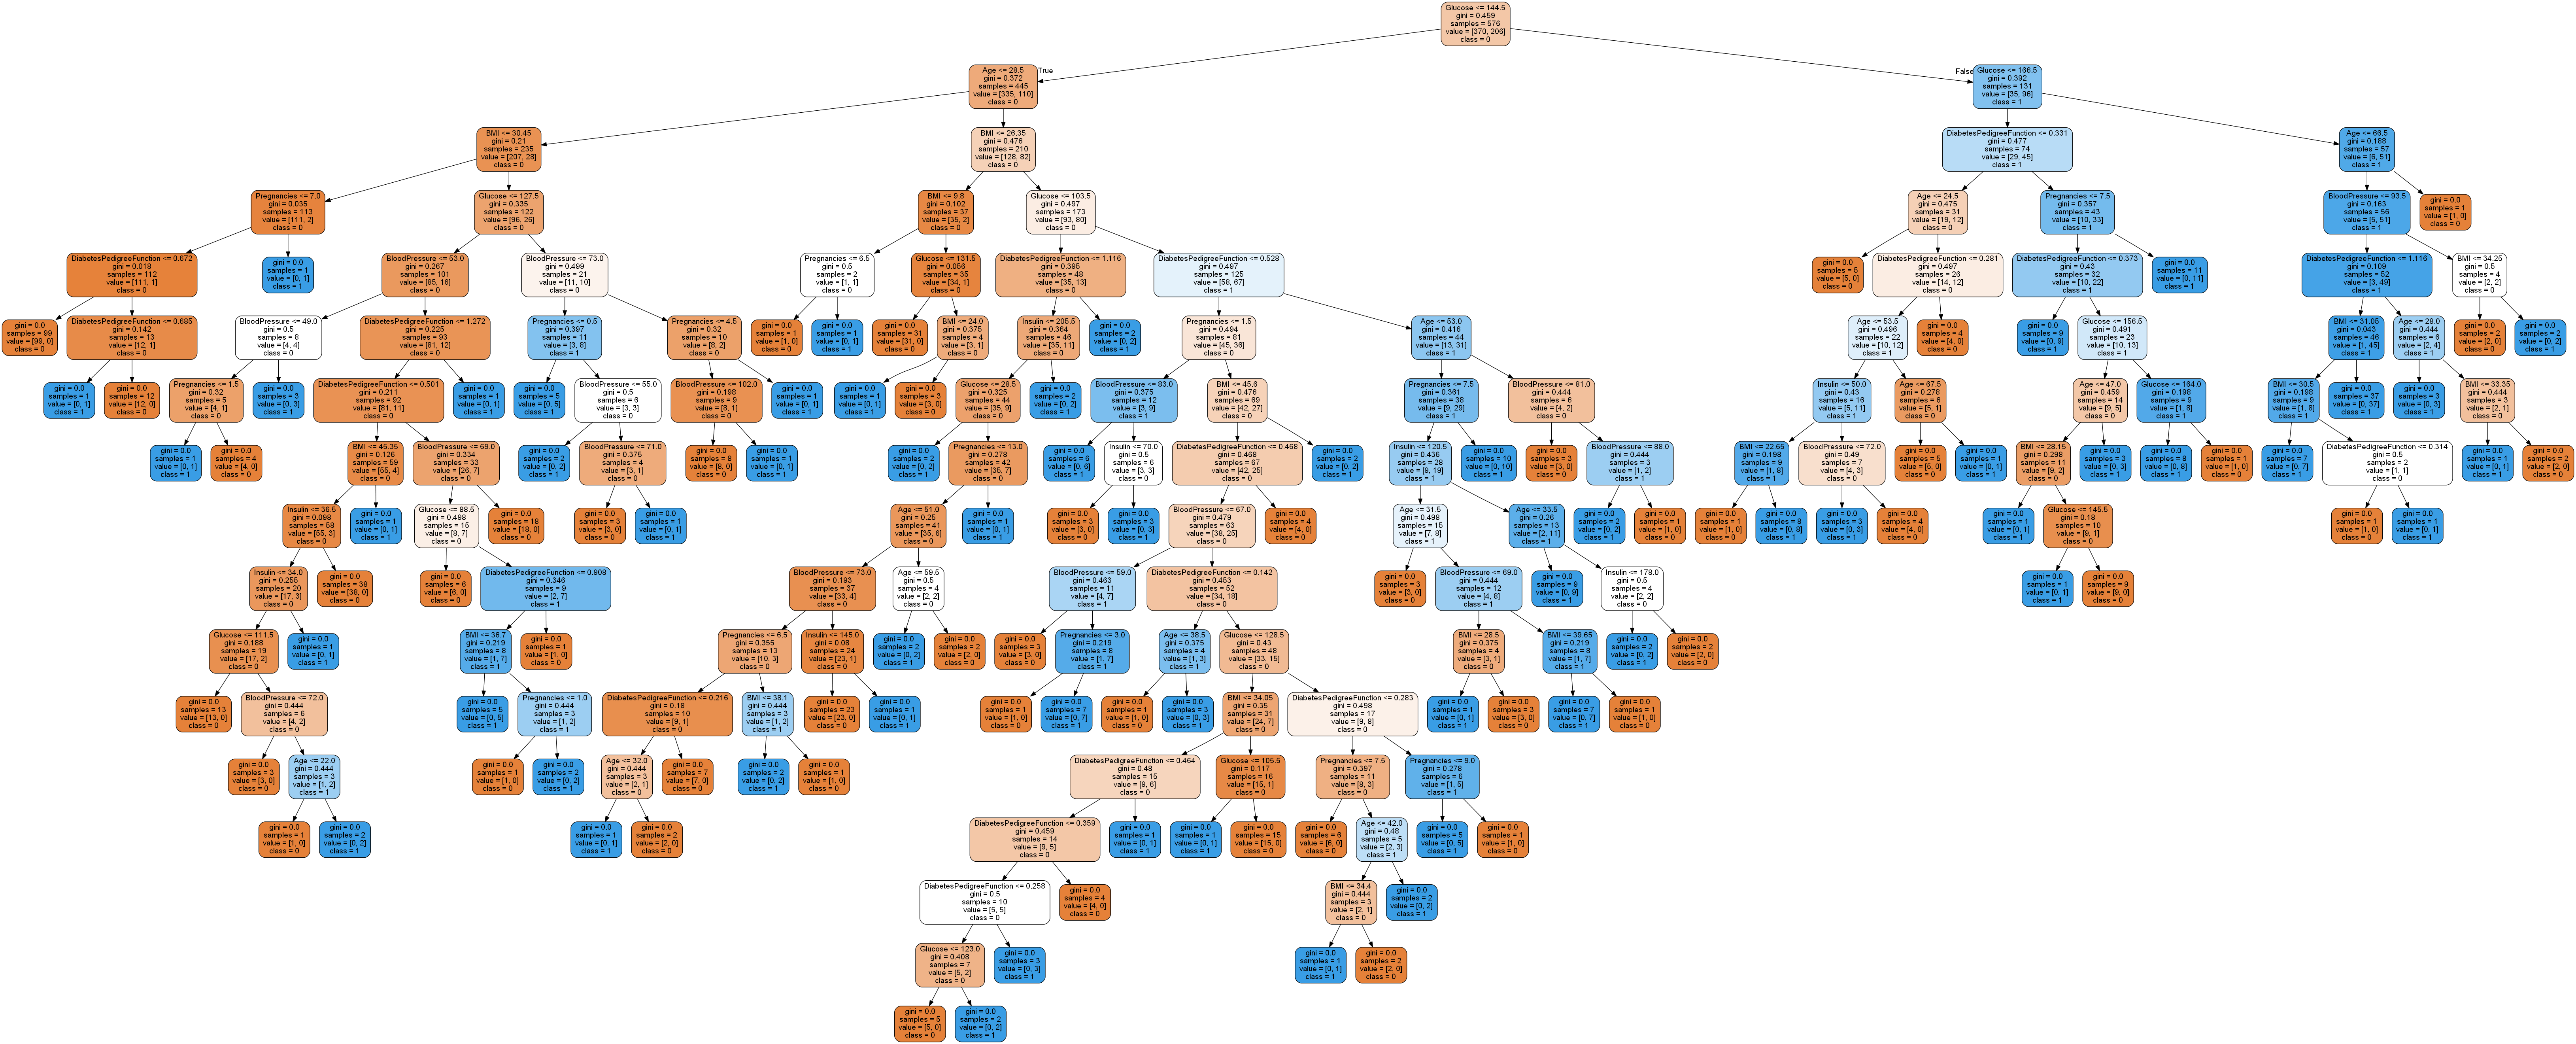

In [79]:
import os
os.environ["PATH"]+=os.pathsep+ 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
export_graphviz(dstClf, out_file=dot_data, filled=True, rounded=True, feature_names=sel_names, class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(dot_data.getvalue)
#graph=graphviz.Source(dot_data)
graph
#graph.write_png("test.png")
Image(graph[0].create_png())